In [83]:
import matplotlib.pyplot as plt
import numpy as np

In [84]:
# mp, suprafata
apartamente = np.array([
    (40, 65_000), (49, 71_000), (50, 75_000), (57, 83_000), (60, 120_000), (73, 154_000), (85, 170_000), (91, 210_000), (100, 300_000)
])
suprafete = apartamente[:, 0]
preturi = apartamente[:, 1]

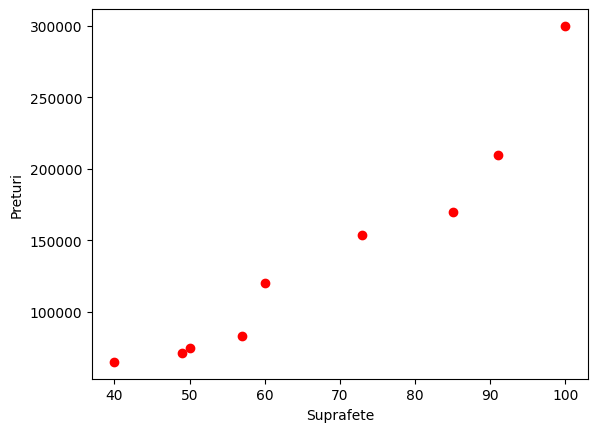

In [85]:
plt.scatter(suprafete, preturi, c="red")
plt.xlabel("Suprafete");
plt.ylabel("Preturi");

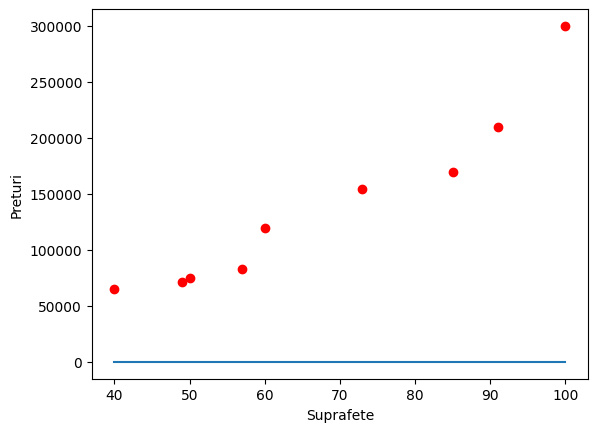

In [86]:
def linear_plot(x, y, a, b):
    plt.scatter(x, y, c="red")
    plt.plot(x, a * x + b)

a = 0
b = 0
linear_plot(suprafete, preturi, a, b)
plt.xlabel("Suprafete");
plt.ylabel("Preturi");

In [87]:
preturi

array([ 65000,  71000,  75000,  83000, 120000, 154000, 170000, 210000,
       300000])

In [88]:
preturi_calculate = a * preturi + b
preturi_calculate

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

In [89]:
preturi - preturi_calculate

array([ 65000,  71000,  75000,  83000, 120000, 154000, 170000, 210000,
       300000])

In [90]:
preturi[0] - preturi_calculate[0], preturi[1] - preturi_calculate[1], preturi[2] - preturi_calculate[2]

(np.int64(65000), np.int64(71000), np.int64(75000))

In [91]:
(preturi - preturi_calculate) ** 2

array([ 4225000000,  5041000000,  5625000000,  6889000000, 14400000000,
       23716000000, 28900000000, 44100000000, 90000000000])

In [92]:
((preturi - preturi_calculate) ** 2).sum()

np.int64(222896000000)

In [93]:
np.sqrt(((preturi - preturi_calculate) ** 2).sum())

np.float64(472118.62916008726)

In [94]:
1 / (2 * (preturi.size)) * np.sqrt(((preturi - preturi_calculate) ** 2).sum())

np.float64(26228.81273111596)

In [95]:
derivata_a = 2 * np.sum((preturi - preturi_calculate) * suprafete)
derivata_b = 2 * np.sum((preturi - preturi_calculate)) 

print("derivata_a = ", derivata_a, "derivata_b", derivata_b)

derivata_a =  193124000 derivata_b 2496000


In [96]:
LEARNING_RATE = 0.001

In [97]:
noul_a = a - derivata_a * LEARNING_RATE
noul_b = b - derivata_b * LEARNING_RATE
noul_a, noul_b

(np.float64(-193124.0), np.float64(-2496.0))

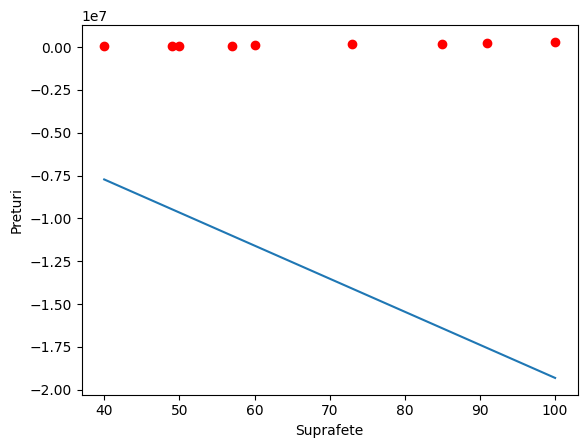

In [98]:
def linear_plot(x, y, a, b):
    plt.scatter(x, y, c="red")
    plt.plot(x, a * x + b)

a = noul_a
b = noul_b
linear_plot(suprafete, preturi, a, b)
plt.xlabel("Suprafete");
plt.ylabel("Preturi");

# Calcul gradient in mai multi pasi

In [99]:
a = 0
b = 0

cost = []


def calculeaza_gradient():
    global a, b
    LEARNING_RATE = 0.001
    preturi_calculate = a * preturi + b
    suma_reziduala = 1 / (2 * (preturi.size)) * np.sqrt(((preturi - preturi_calculate) ** 2).sum())
    cost.append(suma_reziduala)

    derivata_a =  1 / ( (preturi.size)) * np.sum((preturi_calculate - preturi ) * suprafete)
    derivata_b = 1 / ( (preturi.size))  * np.sum((preturi_calculate - preturi  )) 
    
    a = a - derivata_a * LEARNING_RATE
    b = b - derivata_b * LEARNING_RATE

    linear_plot(suprafete, preturi, a, b)
    print(f"Noua suma reziduala este {suma_reziduala} noul_a : {a}, noul_b: {b}")

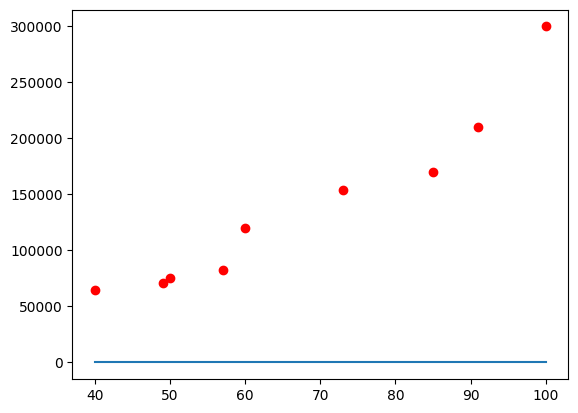

In [100]:
linear_plot(suprafete, preturi, a, b)

Noua suma reziduala este 26228.81273111596 noul_a : 10729.11111111111, noul_b: 138.66666666666666


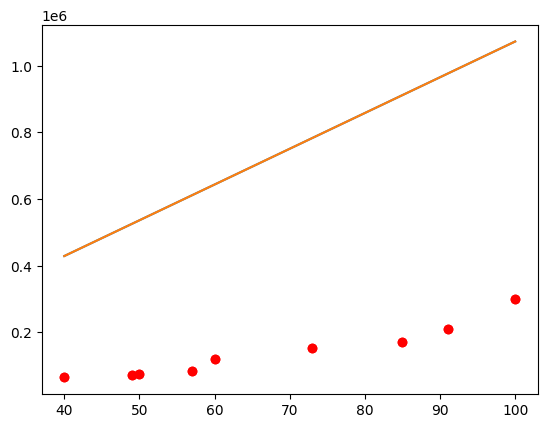

In [101]:
calculeaza_gradient()
linear_plot(suprafete, preturi, a, b)

Noua suma reziduala este 281385637.6559346 noul_a : -115092376.33382715, noul_b: -1487492.879407407


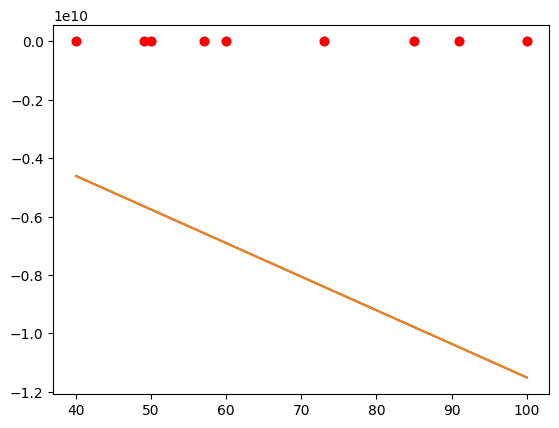

In [102]:
calculeaza_gradient()
linear_plot(suprafete, preturi, a, b)

Noua suma reziduala este 3018736630314.7656 noul_a : 1234723912072.8008, noul_b: 15957990318.237501


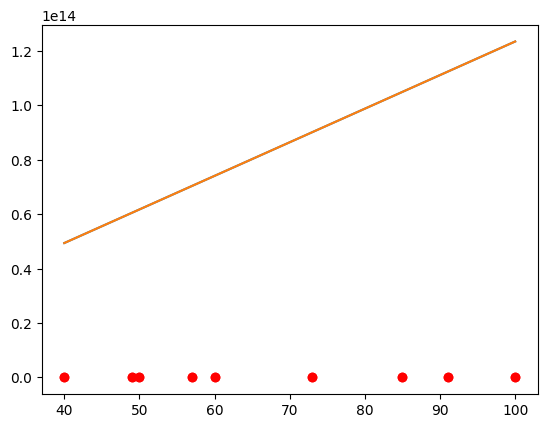

In [103]:
calculeaza_gradient()
linear_plot(suprafete, preturi, a, b)

In [104]:
import time

Noua suma reziduala este 3.238534460788474e+16 noul_a : -1.3246256392983638e+16, noul_b: -171199107108295.1
Noua suma reziduala este 3.4743360346148825e+20 noul_a : 1.421073218985788e+20, noul_b: 1.8366431919190633e+18
Noua suma reziduala este 3.727306603519846e+24 noul_a : -1.5245432624936233e+24, noul_b: -1.97037138300542e+22
Noua suma reziduala este 3.998696262603342e+28 noul_a : 1.6355470838254853e+28, noul_b: 2.113836483889995e+26
Noua suma reziduala este 4.289846127887183e+32 noul_a : -1.7546332263701427e+32, noul_b: -2.2677474506399322e+30
Noua suma reziduala este 4.602194963657373e+36 noul_a : 1.8823901736176495e+36, noul_b: 2.4328648592629455e+34
Noua suma reziduala este 4.937286292351205e+40 noul_a : -2.0194492572459697e+40, noul_b: -2.6100046642170334e+38
Noua suma reziduala este 5.296776022123761e+44 noul_a : 2.16648777694887e+44, noul_b: 2.8000422305817895e+42
Noua suma reziduala este 5.682440629786657e+48 noul_a : -2.3242323474222193e+48, noul_b: -3.0039166598169315e+46
N

/var/folders/3k/f_77v9pn1r94_xmvm2w3xgqr0000gn/T/ipykernel_24208/3327969991.py:11: RuntimeWarning: overflow encountered in square
  suma_reziduala = 1 / (2 * (preturi.size)) * np.sqrt(((preturi - preturi_calculate) ** 2).sum())
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/numpy/_core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/var/folders/3k/f_77v9pn1r94_xmvm2w3xgqr0000gn/T/ipykernel_24208/3327969991.py:14: RuntimeWarning: overflow encountered in multiply
  derivata_a =  1 / ( (preturi.size)) * np.sum((preturi_calculate - preturi ) * suprafete)
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/numpy/_core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/3k/f_77v9pn1r94_xmvm2w3xgqr0000gn/T/ipykernel_24208/3327969991.py:17: RuntimeWarning: invalid value 

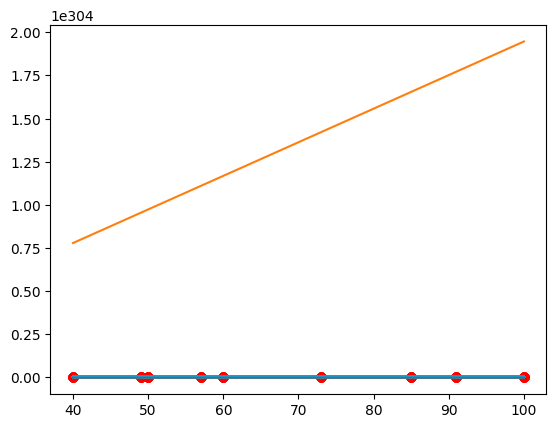

In [105]:
EPOCI = 100

for i in range(EPOCI):
    calculeaza_gradient()

linear_plot(suprafete, preturi, a, b)
    # time.sleep(1)

In [106]:
cost

[np.float64(26228.81273111596),
 np.float64(281385637.6559346),
 np.float64(3018736630314.7656),
 np.float64(3.238534460788474e+16),
 np.float64(3.4743360346148825e+20),
 np.float64(3.727306603519846e+24),
 np.float64(3.998696262603342e+28),
 np.float64(4.289846127887183e+32),
 np.float64(4.602194963657373e+36),
 np.float64(4.937286292351205e+40),
 np.float64(5.296776022123761e+44),
 np.float64(5.682440629786657e+48),
 np.float64(6.096185939556369e+52),
 np.float64(6.540056540993732e+56),
 np.float64(7.016245892674908e+60),
 np.float64(7.527107161522735e+64),
 np.float64(8.075164851362773e+68),
 np.float64(8.663127278168454e+72),
 np.float64(9.293899953643783e+76),
 np.float64(9.970599943280705e+80),
 np.float64(1.0696571269843853e+85),
 np.float64(1.1475401438401465e+89),
 np.float64(1.2310939164563587e+93),
 np.float64(1.3207313393534575e+97),
 np.float64(1.4168953703965553e+101),
 np.float64(1.520061219743582e+105),
 np.float64(1.630738698173365e+109),
 np.float64(1.749474736398286e